# Modélisation avec features polynomiales : avantages et inconvénients

# Introduction :

### Définitions de _Polynômes_ et de _Régression Polynomiale_

"C'est une **fonction mathématiques**, un **cas particulier de régression linéaire multiple**, où les observations sont construites à partir des puissances d'une seule variable."

exemple : \begin{equation}y=w_1x_1^2 + w_2x_1 + b\end{equation}

La **régression linéaire** est une **régression polynomiale de degré 1**

### [Exemple de graphique permettant de comprendre l'utilisation de la régression linéaire en machine learning](https://fr.wikipedia.org/wiki/R%C3%A9gression_polynomiale#/media/Fichier:Lsf.gif)

# [Les Features Polynomiales et leurs usages](http://localhost:8888/notebooks/Desktop/Sujets%20de%20Veille/les_features_polynomiales_et_leurs_usages.ipynb)

# Applications d'un modèle avec features polynomiales à un problème de régression

### [Présentation de la Regression Polynomiale avec la librairie NumPy](http://localhost:8888/notebooks/Desktop/Sujets%20de%20Veille/regression_polynomiale_numpy.ipynb)

### [Présentation de la Regression Polynomiale avec la librairie Scikit-learn](http://localhost:8888/notebooks/Desktop/Sujets%20de%20Veille/regressison_polynomiale_sklearn.ipynb)

# Applications d'un modèle avec features polynomiales à un problème de classification

Tableau blanc (présentation d'un cas simple)

## Dans la librairie Scikit-Learn

Il existe une méthode qui s'appelle **Support Vector Machines (SVM)** pour faire de la classification non linéaire

[méthode non linear SVMs](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

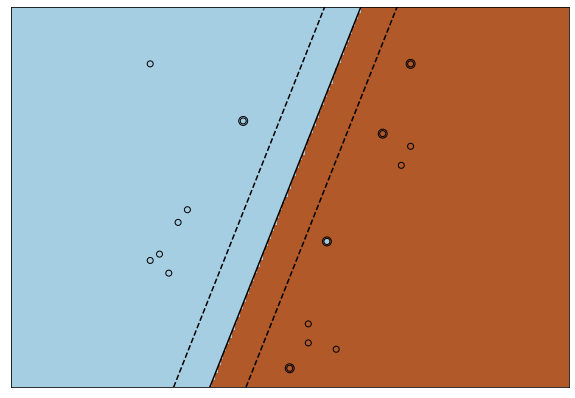

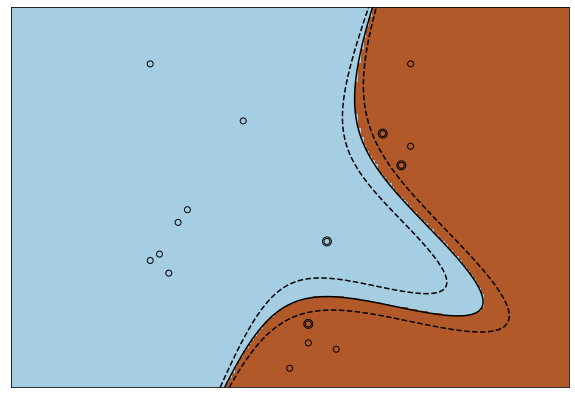

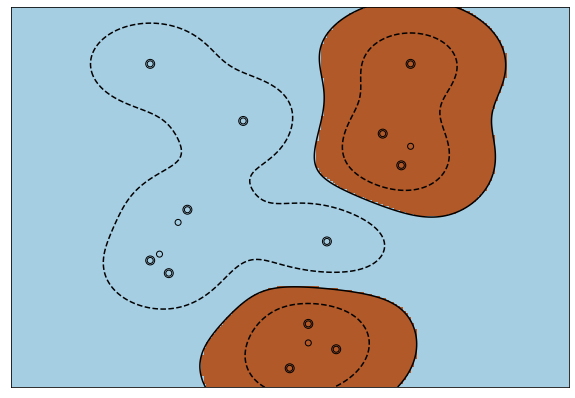

In [10]:
fignum = 1    
    
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)
# plot the line, the points, and the nearest vectors to the plane
# figure number
    plt.figure(fignum, figsize=(10, 7))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

# Conclusion : Récapitulatif des avantages et inconvénients

### Avantages des fonctions polynomiales :
- Faciles à calculer.
- Peuvent modéliser une large gamme de fonction. 
- Peuvent s'adapter à une large gamme de courbure.
- Les polynomes fournissent la meilleure apporximation de la relation entre variables dépendantes et indépendantes.

### Inconvénients des fonctions polynomiales :
- Très sensible à la présence d'outlier : il en suffit d'un ou deux pour affecter dramatiquement les résultats d'analyses non linéaires.
- Moins d'outils de validation disponibles pour la détection d'outliers pour les régressions non linéaires, que pour les régressions linéaires.
- Augmenter le degré du polynome n'améliore pas nécessairement l'accuracy, voire la dégrade, car occasionne de l'overfitting (en absence de régulation).
- Sont faiblement extrapolables quand le degré augmente.